In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def gen_make_commands():

    valid_n = [4 << i for i in range(15)]
    valid_k = [2 << i for i in range(7)]
    
    i = 1
    for n in valid_n:
        for k in valid_k:
            print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i}")
            i += 1
    
    with open('run_tests.sh', 'w') as output:
        output.write('echo "N,K,Time(usec)" > test/results.csv\n')
        for j in range(1,i):
            output.write(f'./bin/int_test-{j} >> test/results.csv\n')
    
gen_make_commands()

$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=2 obj/* $^ -o bin/$@-1
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=4 obj/* $^ -o bin/$@-2
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=8 obj/* $^ -o bin/$@-3
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=16 obj/* $^ -o bin/$@-4
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=32 obj/* $^ -o bin/$@-5
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=64 obj/* $^ -o bin/$@-6
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=128 obj/* $^ -o bin/$@-7
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=2 obj/* $^ -o bin/$@-8
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=4 obj/* $^ -o bin/$@-9
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=8 obj/* $^ -o bin/$@-10
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=16 obj/* $^ -o bin/$@-11
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=32 obj/* $^ -o bin/$@-12
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=64 obj/* $^ -o bin/$@-13
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=128 obj/* $^ -o bin/$@-14
$(CC) $(CFLAGS) -DNSAMPLES=16  -DKCLASSES=2 obj/* $^ -o bin/$@-15
$(CC) $(CFLAGS) -DNSAMP

In [52]:
df = pd.read_csv('results.csv')

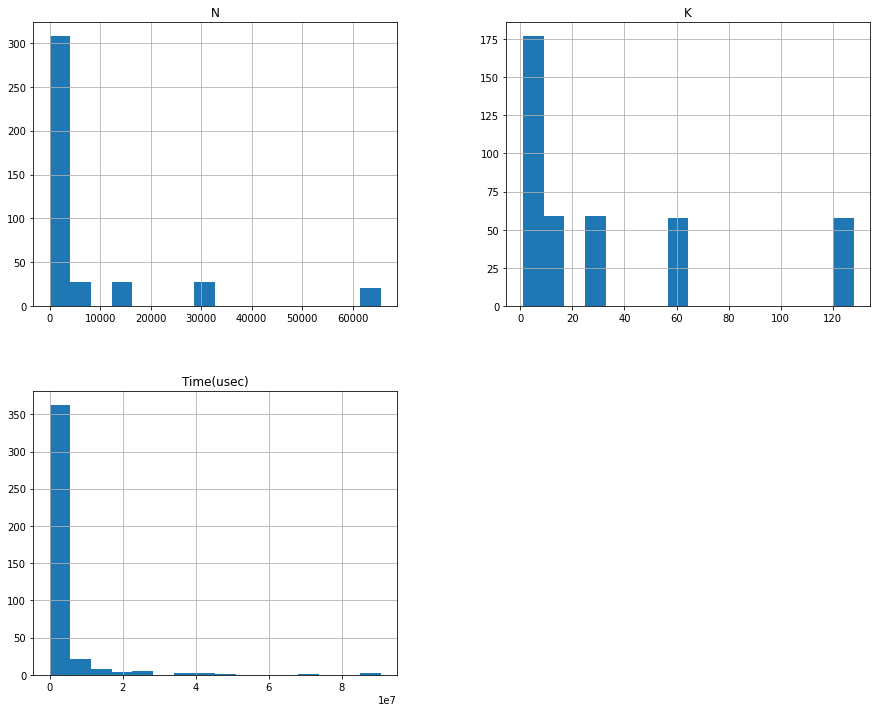

In [53]:
_ = df.hist(figsize=(15,12), bins=16)

In [54]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   N           411 non-null    int64
 1   K           411 non-null    int64
 2   Time(usec)  411 non-null    int64
dtypes: int64(3)
memory usage: 9.8 KB


(                  N           K    Time(usec)
 count    411.000000  411.000000  4.110000e+02
 mean    7692.939173   35.503650  2.906402e+06
 std    15973.475794   42.364411  9.478627e+06
 min        3.000000    1.000000  1.842000e+04
 25%       32.000000    4.000000  3.226900e+04
 50%      511.000000   15.000000  1.434230e+05
 75%     6143.500000   63.000000  1.412864e+06
 max    65536.000000  128.000000  9.069567e+07,
 None)

In [55]:
df.sort_values(by=['N', 'K'], inplace=True)

In [56]:
df_n = df.drop(columns=['K']).groupby(['N']).mean()
df_k = df.drop(columns=['N']).groupby(['K']).mean()
df_n.describe(), df_k.describe()

(         Time(usec)
 count  3.000000e+01
 mean   3.236930e+06
 std    6.203288e+06
 min    2.810814e+04
 25%    4.352918e+04
 50%    2.005591e+05
 75%    3.126412e+06
 max    2.381157e+07,
          Time(usec)
 count  1.400000e+01
 mean   2.922342e+06
 std    3.483492e+06
 min    3.782267e+05
 25%    6.459880e+05
 50%    1.274472e+06
 75%    3.482809e+06
 max    1.112244e+07)

Text(0, 0.5, 'Time(usec)')

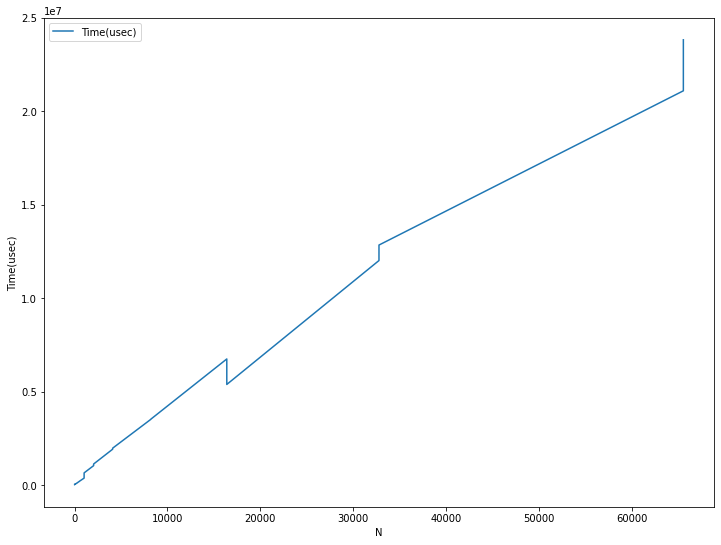

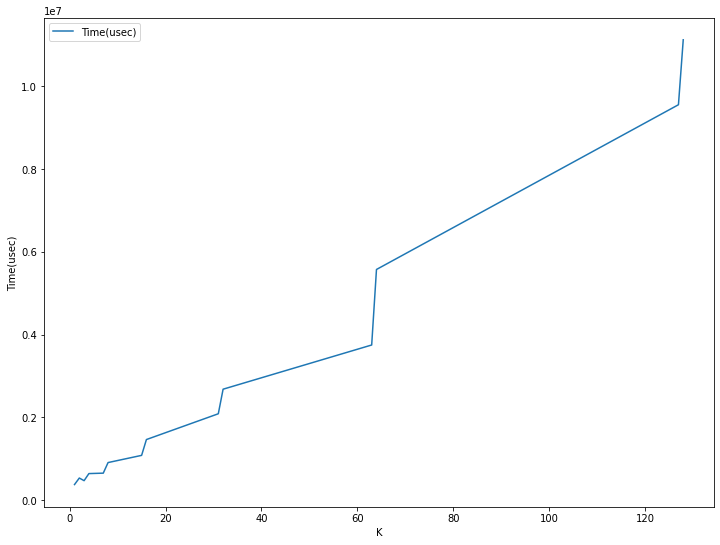

In [57]:
_ = df_n.plot(figsize=(12,9))
plt.xlabel('N')
plt.ylabel('Time(usec)')
_ = df_k.plot(figsize=(12,9))
plt.xlabel('K')
plt.ylabel('Time(usec)')

Text(0, 0.5, 'Time(usec)')

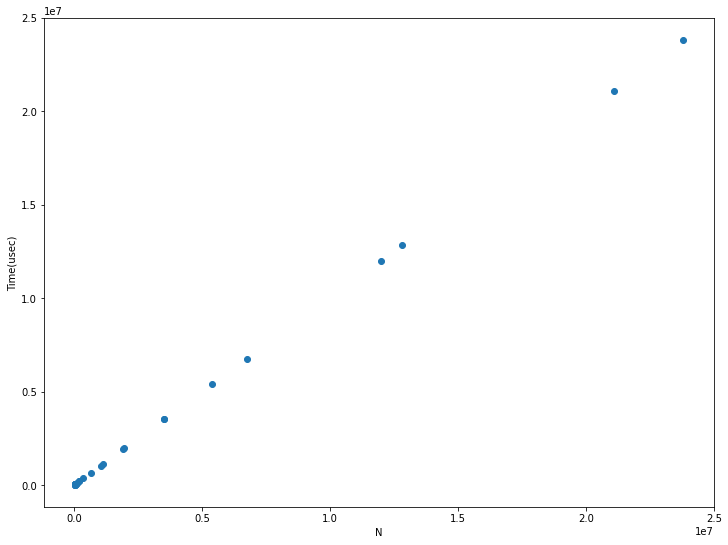

In [58]:
plt.figure(figsize=(12,9))
plt.scatter(df_n, df_n['Time(usec)'])
plt.xlabel('N')
plt.ylabel('Time(usec)')

Text(0, 0.5, 'Time(usec)')

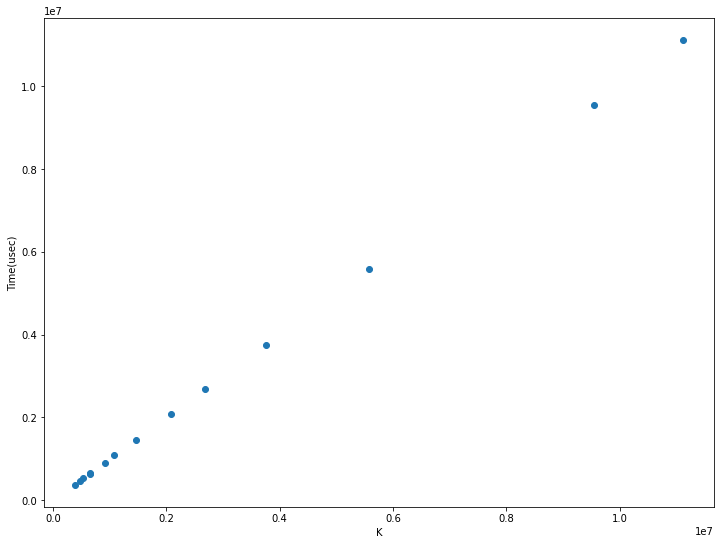

In [59]:
plt.figure(figsize=(12,9))
plt.scatter(df_k, df_k['Time(usec)'])
plt.xlabel('K')
plt.ylabel('Time(usec)')